In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('precision', 2)

df1 = pd.read_csv("Seasons_Stats.csv")
print(df1.shape)

df = df1.drop(['Unnamed: 0', 'Player', 'Pos', 'Tm','GS', 'MP', 'PER', '3PAr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 
              'BLK%', 'TOV%', 'blanl', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', '3P', '3PA', '3P%',
              'ORB%', 'DRB%', 'AST%', 'TRB%', 'STL%', 'BLK%', 'TOV%', 'USG%',
              'WS/48', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV'], axis=1)

df.fillna(0, inplace=True)
df.info()
df.head(8)


(24691, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 21 columns):
Year    24691 non-null float64
Age     24691 non-null float64
G       24691 non-null float64
TS%     24691 non-null float64
FTr     24691 non-null float64
OWS     24691 non-null float64
DWS     24691 non-null float64
WS      24691 non-null float64
FG      24691 non-null float64
FGA     24691 non-null float64
FG%     24691 non-null float64
2P      24691 non-null float64
2PA     24691 non-null float64
2P%     24691 non-null float64
eFG%    24691 non-null float64
FT      24691 non-null float64
FTA     24691 non-null float64
FT%     24691 non-null float64
AST     24691 non-null float64
PF      24691 non-null float64
PTS     24691 non-null float64
dtypes: float64(21)
memory usage: 4.0 MB


,Year,Age,G,TS%,FTr,OWS,DWS,WS,FG,FGA,FG%,2P,2PA,2P%,eFG%,FT,FTA,FT%,AST,PF,PTS
0,1950.0,31.0,63.0,0.37,0.47,-0.1,3.6,3.5,144.0,516.0,0.28,144.0,516.0,0.28,0.28,170.0,241.0,0.70,176.0,217.0,458.0
1,1950.0,29.0,49.0,0.43,0.39,1.6,0.6,2.2,102.0,274.0,0.37,102.0,274.0,0.37,0.37,75.0,106.0,0.71,109.0,99.0,279.0
2,1950.0,25.0,67.0,0.39,0.26,0.9,2.8,3.6,174.0,499.0,0.35,174.0,499.0,0.35,0.35,90.0,129.0,0.70,140.0,192.0,438.0
3,1950.0,24.0,15.0,0.31,0.40,-0.5,-0.1,-0.6,22.0,86.0,0.26,22.0,86.0,0.26,0.26,19.0,34.0,0.56,20.0,29.0,63.0
4,1950.0,24.0,13.0,0.31,0.38,-0.5,-0.1,-0.6,21.0,82.0,0.26,21.0,82.0,0.26,0.26,17.0,31.0,0.55,20.0,27.0,59.0
5,1950.0,24.0,2.0,0.38,0.75,0.0,0.0,0.0,1.0,4.0,0.25,1.0,4.0,0.25,0.25,2.0,3.0,0.67,0.0,2.0,4.0
6,1950.0,22.0,60.0,0.42,0.30,3.6,1.2,4.8,340.0,936.0,0.36,340.0,936.0,0.36,0.36,215.0,282.0,0.76,233.0,132.0,895.0
7,1950.0,23.0,3.0,0.28,0.31,-0.1,0.0,-0.1,5.0,16.0,0.31,5.0,16.0,0.31,0.31,0.0,5.0,0.00,2.0,6.0,10.0


In [8]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# преобразуем все признаки в числовые, выкинув штаты
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = df.replace(np.nan, 0)


In [9]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(df_scaled)

Wall time: 17min 56s


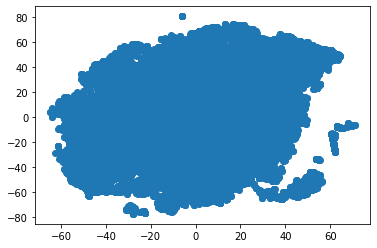

In [10]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

In [18]:
d = df[['Year', 'Age', 'G', 'TS%', 'FTr', 'OWS', 'AST', 'PF']]
d.head()

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# преобразуем все признаки в числовые, выкинув штаты
scaler = StandardScaler()
d_scaled = scaler.fit_transform(d)
d = d.replace(np.nan, 0)



In [19]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(d_scaled)

Wall time: 16min 14s


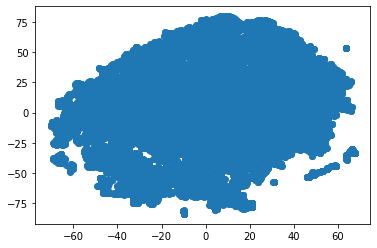

In [20]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

In [6]:
d2 = df[['Year', 'Age', 'G', 'TS%', 'FTr']]
d2.head()

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# преобразуем все признаки в числовые, выкинув штаты
scaler = StandardScaler()
d2_scaled = scaler.fit_transform(d2)
d2 = d2.replace(np.nan, 0)


In [8]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(d2_scaled)

Wall time: 13min 10s


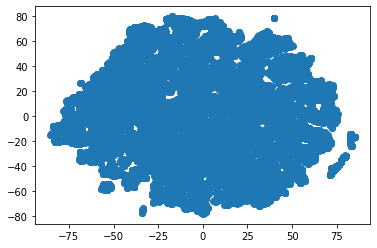

In [9]:
#Бачимо, що залишивши тільки 'Year', 'Age', 'G', 'TS%', 'FTr',  ситуація істотно не змінилась
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);